### Support Vector Machine (SVM) Algorithm

Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks

It tries to find the best `decision boundary` (also called a hyperplane) that separates different classes in the data.

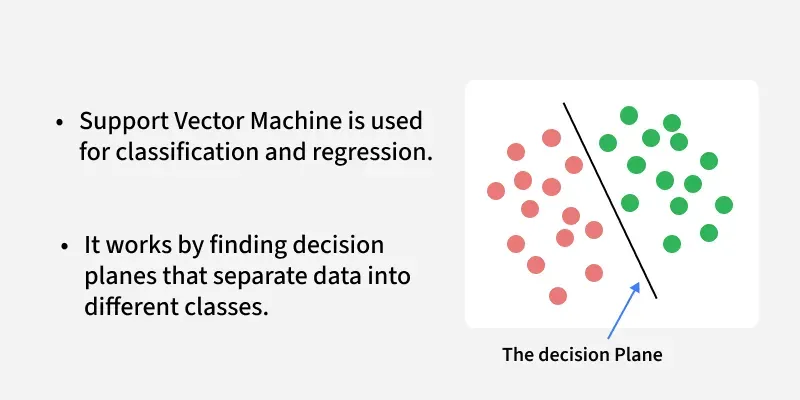

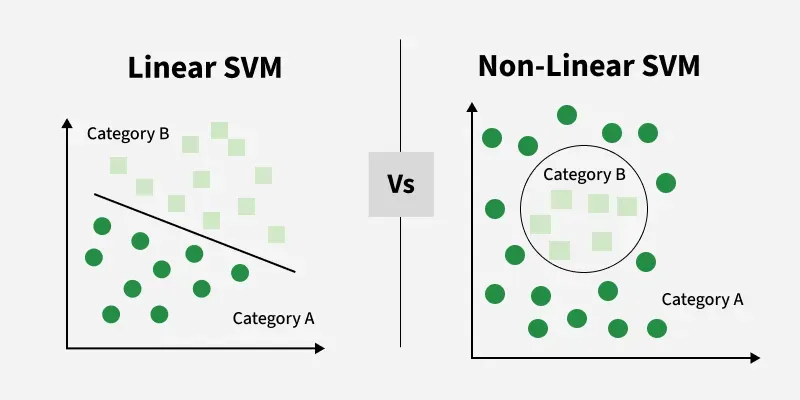

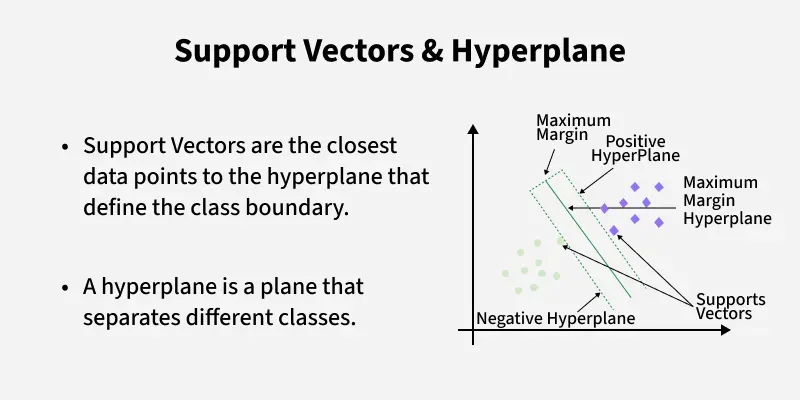

#### Key Concepts of Support Vector Machine

- `Hyperplane`: 
    - In 2D: It’s just a line that separates data points.
    - In 3D: It’s a plane.
    - In higher dimensions: It’s called a hyperplane.
- `Support Vectors`: The closest data points to the hyperplane.
- `Margin`: 
    - The distance between the hyperplane and the support vectors.
    - SVM chooses the hyperplane that maximizes the margin.
- `Kernel`: A function that maps data to a higher-dimensional space enabling SVM to handle non-linearly separable data.
- `Hard Margin`:
    - Used when the data is perfectly linearly separable (no overlap between classes).
    - The algorithm finds a hyperplane that separates all data points correctly.
    - No misclassifications allowed. (Maximum separation)
    - It maximizes the margin under the strict rule that every point must be on the correct side.
    - Very sensitive to outliers (one misclassified point ruins everything).
- `Soft Margin`: 
    - Used when data is not perfectly separable.
    - Introduces slack variables to allow some points to be on the wrong side of the margin or even misclassified.
    - Slack variables `(𝜉𝑖)` are numbers that measure how much a data point violates the margin in SVM.
    - Balances margin maximization with classification errors.
    - More robust to noisy data & outliers.
    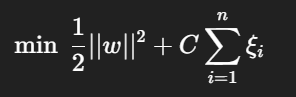
    - C: Penalty parameter (controls trade-off between margin size and misclassification).
    - High C → Less tolerance for misclassification → Narrow margin, tries to classify all correctly (like hard margin).
    - Low C → More tolerance for misclassification → Wider margin, allows errors for better generalization.
- `Hinge Loss`: A loss function penalizing misclassified points or margin violations and is combined with regularization in SVM.


### How does Support Vector Machine Algorithm Work?

The key idea behind the SVM algorithm is to find the hyperplane that best separates two classes by maximizing the margin between them.

This margin is the distance from the hyperplane to the nearest data points (support vectors) on each side.

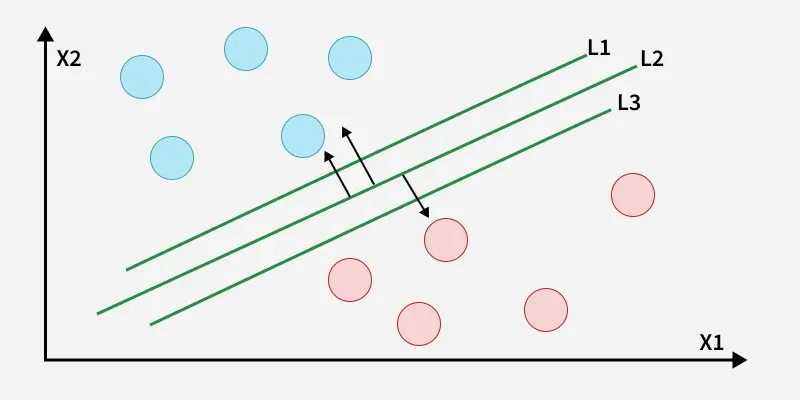

The best hyperplane also known as the "hard margin" is the one that maximizes the distance between the hyperplane and the nearest data points from both classes. 

This ensures a clear separation between the classes.

So from the above figure, we choose L2 as hard margin. 

 Let's consider a scenario like shown below:

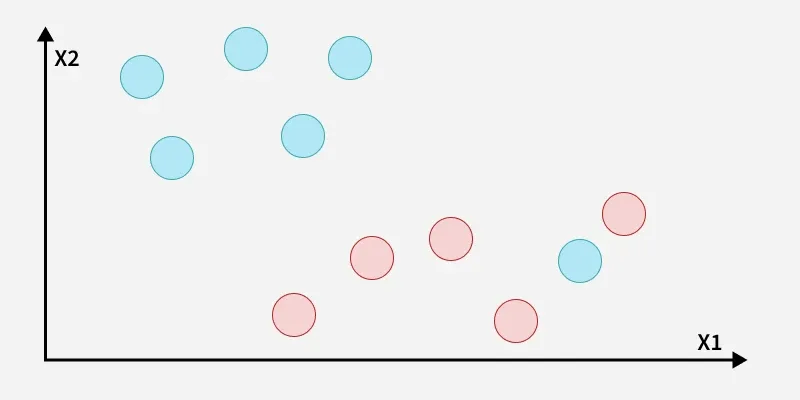

#### How does SVM classify the data?

The blue ball in the boundary of red ones is an outlier of blue balls.

The SVM algorithm has the characteristics to ignore the outlier and finds the best hyperplane that maximizes the margin. SVM is robust to outliers.

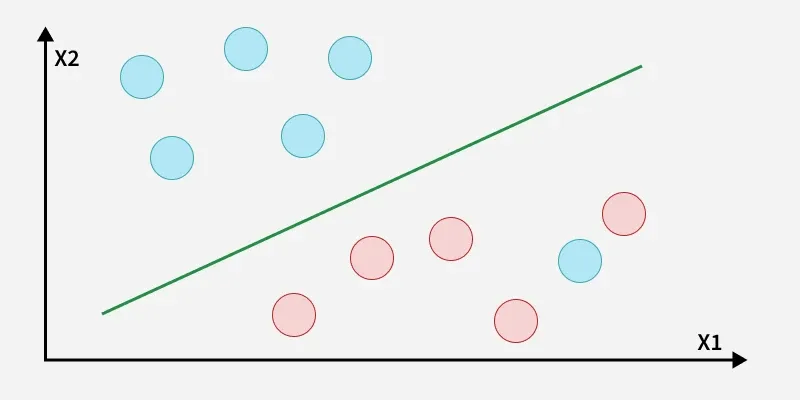

A soft margin allows for some misclassifications or violations of the margin to improve generalization. 

The SVM optimizes the following equation to balance margin maximization and penalty minimization:

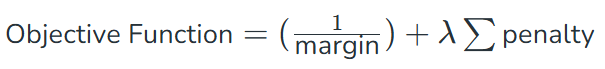

The penalty used for violations is often `hinge loss` which has the following behavior:

- If a data point is correctly classified and within the margin there is no penalty (loss = 0).
- If a point is incorrectly classified or violates the margin the hinge loss increases proportionally to the distance of the violation.

### Types of Support Vector Machine

Based on the nature of the decision boundary, Support Vector Machines (SVM) can be divided into two main parts:

`Linear SVM`: Linear SVMs use a linear decision boundary to separate the data points of different classes. When the data can be precisely linearly separated, linear SVMs are very suitable.

`Non-Linear SVM`: Non-Linear SVM can be used to classify data when it cannot be separated into two classes by a straight line (in the case of 2D). By using kernel functions, nonlinear SVMs can handle nonlinearly separable data. 

### Kernel Trick

The kernel trick is a technique used in SVM to handle non-linearly separable data.

- In simple SVM, we look for a `linear hyperplane` to separate classes.
- But many datasets cannot be separated by a straight line in their original feature space.

Idea:

    Instead of working in the original space, we map data into a higher-dimensional space where a linear hyperplane can separate the classes.

#### Common Kernels

| Kernel             | What It Does                                                  | Use Case                      |
| ------------------ | ------------------------------------------------------------- | ----------------------------- |
| **Linear**         | No transformation, uses original features                     | Linearly separable data       |
| **Polynomial**     | Maps features to polynomial combinations (x1², x1x2…)         | Curved boundaries             |
| **RBF / Gaussian** | Maps data into infinite dimensions using distance from points | Complex non-linear boundaries |
| **Sigmoid**        | Similar to a neural network activation function               | Rarely used                   |


#### Implementing SVM Algorithm Using Scikit-Learn

We will predict whether cancer is Benign or Malignant using historical data about patients diagnosed with cancer. 

This data includes independent attributes such as tumor size, texture, and others.

To perform this classification, we will use an SVM (Support Vector Machine) classifier to differentiate between benign and malignant cases effectively.

The dataset is about **classifying breast tumors** into two categories:  
- `0` → **Malignant** (cancerous)  
- `1` → **Benign** (not cancerous)  

The **goal** is to train a classifier (e.g., SVM) to predict whether a tumor is malignant or benign based on its features.

#### Features
The dataset contains **30 numeric features**, computed from a digitized image of a breast mass (biopsy).  
These features describe cell nuclei characteristics.

They are grouped into three categories for each property:

#### 1. **Mean features** (first 10 columns)
- `mean radius` → average distance from center to perimeter points  
- `mean texture` → standard deviation of gray-scale values  
- `mean perimeter`  
- `mean area`  
- `mean smoothness` → local variation in radius lengths  
- `mean compactness` → (perimeter² / area - 1.0)  
- `mean concavity` → severity of concave portions of contour  
- `mean concave points` → number of concave portions  
- `mean symmetry`  
- `mean fractal dimension` → measure of complexity  

#### 2. **Standard Error (SE) features** (next 10 columns)
- `radius error`  
- `texture error`  
- `perimeter error`  
- `area error`  
- `smoothness error`  
- … (and more for each measurement)  

#### 3. **Worst (largest value) features** (last 10 columns)
- `worst radius`  
- `worst texture`  
- `worst perimeter`  
- `worst area`  
- `worst smoothness`  
- … (and more)  

---

In [7]:
# Import libraries
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [14]:
#load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (569, 30)
Target shape: (569,)


In [22]:
print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [15]:
#Select two features for visualization (mean radius & mean texture)
X_vis = X[:, [0, 1]]  # columns 0 and 1
feature_x, feature_y = feature_names[0], feature_names[1]

In [16]:
#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_vis, y, test_size=0.3, random_state=42)

In [17]:
#Scale features (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train SVM model
svm = SVC(kernel="linear", C=1.0, random_state=42)
svm.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [ ]:
# Evaluate
print("Training accuracy:", svm.score(X_train, y_train))
print("Testing accuracy:", svm.score(X_test, y_test))

Training accuracy: 0.8819095477386935
Testing accuracy: 0.9005847953216374


<Figure size 800x600 with 0 Axes>

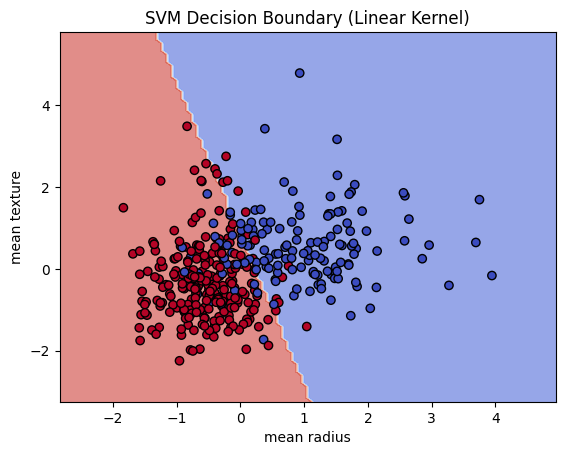

In [ ]:
# Plot decision boundary
plt.figure(figsize=(8,6))
disp = DecisionBoundaryDisplay.from_estimator(
    svm,
    X_train,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.6
)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors="k")
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title("SVM Decision Boundary (Linear Kernel)")
plt.show()

#### Advantages of Support Vector Machine (SVM)

- High-Dimensional Performance: SVM excels in high-dimensional spaces, making it suitable for image classification and gene expression analysis.
- Nonlinear Capability: Utilizing kernel functions like RBF and polynomial SVM effectively handles nonlinear relationships.
- Outlier Resilience: The soft margin feature allows SVM to ignore outliers, enhancing robustness in spam detection and anomaly detection.
- Binary and Multiclass Support: SVM is effective for both binary classification and multiclass classification suitable for applications in text classification.
- Memory Efficiency: It focuses on support vectors making it memory efficient compared to other algorithms.

#### Disadvantages of Support Vector Machine (SVM)
- Slow Training: SVM can be slow for large datasets, affecting performance in SVM in data mining tasks.
- Parameter Tuning Difficulty: Selecting the right kernel and adjusting parameters like C requires careful tuning, impacting SVM algorithms.
- Noise Sensitivity: SVM struggles with noisy datasets and overlapping classes, limiting effectiveness in real-world scenarios.
- Limited Interpretability: The complexity of the hyperplane in higher dimensions makes SVM less interpretable than other models.
- Feature Scaling Sensitivity: Proper feature scaling is essential, otherwise SVM models may perform poorly.

## Applications of Support Vector Machines (SVM)

### 1. Classification
SVM is widely used for classification tasks because of its ability to find optimal boundaries between classes:

- **Text classification** – spam detection, sentiment analysis, document categorization  
- **Image classification** – face detection, object recognition  
- **Medical diagnosis** – classifying tumors as benign or malignant  
- **Handwriting recognition** – identifying digits and letters  

### 2. Regression (Support Vector Regression, SVR)
SVM can be adapted for predicting continuous values using SVR:

- **Stock price prediction**  
- **Weather forecasting**  
- **Predicting real estate prices**  

### 3. Outlier / Anomaly Detection
SVM can identify abnormal points in data:

- Fraud detection (credit card or transaction fraud)  
- Network intrusion detection  
- Fault detection in machinery or sensors  

### 4. Bioinformatics / Genomics
SVM is used for complex biological data:

- Protein classification  
- Gene expression analysis  
- Predicting disease outcomes  

### 5. Other Applications
- Handwriting and speech recognition  
- Image segmentation and object detection  
- Face detection and verification  

### Key Points
- Works well for **high-dimensional data**  
- Can handle **non-linear relationships** using the kernel trick  
- Sensitive to **feature scaling** and noisy data